## <center>Elements Of Data Science - S2022</center>
# <center>Week 11: Clustering and Recommendation Systems<center>
### <center>4/19/2022</center>

# TODOs

- Readings:
  - Recommended: DSFS: [Chap 9: Getting Data](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_103)
  - Recommended: DSFS: [Chap 23: Databases and SQL](https://web-p-ebscohost-com.ezproxy.cul.columbia.edu/ehost/ebookviewer/ebook?sid=32537b90-c1b2-458d-89f6-37dad7622fee%40redis&ppid=pp_103&vid=0&format=EB)

# Catch up reading on clustering
  - Recommended: DSFS: [Chap 19: Clustering](https://web-p-ebscohost-com.ezproxy.cul.columbia.edu/ehost/ebookviewer/ebook?sid=32537b90-c1b2-458d-89f6-37dad7622fee%40redis&ppid=pp_103&vid=0&format=EB)
  - Recommended: DSFS: [Chap 22: Recommender Systems](https://web-p-ebscohost-com.ezproxy.cul.columbia.edu/ehost/ebookviewer/ebook?sid=32537b90-c1b2-458d-89f6-37dad7622fee%40redis&ppid=pp_103&vid=0&format=EB)

# Catch up reading on text analysis
  - Recommended: DSFS: [Chap 20: Natural Lanuage Processing](https://web-p-ebscohost-com.ezproxy.cul.columbia.edu/ehost/ebookviewer/ebook?sid=32537b90-c1b2-458d-89f6-37dad7622fee%40redis&ppid=pp_103&vid=0&format=EB)
  
<br>

- **HW4: due Monday May 2nd 11:59pm**

- **Quiz 11: due Monday April 25th, 11:59pm ET**

# Today

- **Clustering**
- **Recommendation Systems**
- Start **Time-Series Data?**

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

# Clustering
<br>

- Can we group our data based on the features alone?
- **Unsupervised:** There is no label/target $y$
- Use similarity to group $X$ into $k$ clusters
<br>

- Many methods:
  - **k-Means**
  - **Heirarchical Agglomerative Clustering**
  - Spectral Clustering
  - DBScan
  - ...

# Why do Clustering?
<br>

- Exploratory data analysis
- Group media: images, music, news articles,...
- Group people: social network
- Science applications: gene families, psychological groups,...
- Image segmentation: group pixels, regions, ...
- ...

# Clustering: K-Means
<br>

- Not to be confused with k-NN!
- Idea:
  - Finds $k$ points in space as cluster centers (means)
  - Assigns datapoints to their closest cluster mean
  
  
- Need to specify the number of clusters $k$ up front
- sklearn uses euclidean distance to judge similarity

# $k$-Means: How it works

```
FIRST: choose initial k points (means)

A: fix means -> assign all datapoints to their closest mean

B: fix cluster assignments -> recalculate means

RETURN TO A and Repeat until convergence!
```

# Load Example Data

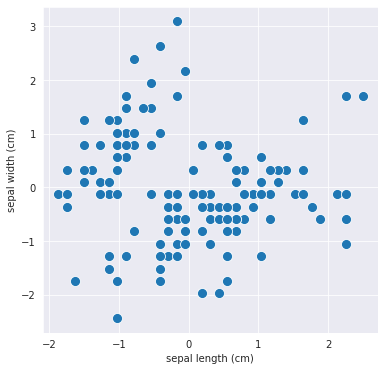

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data[:,:2])
X_iris = pd.DataFrame(X_iris,columns=iris.feature_names[:2])
fig,ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=X_iris,s=100);

# KMeans in sklearn

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', random_state=0) # default init=k-means++

c = km.fit_predict(X_iris)

In [4]:
# cluster assignments
tmp = X_iris.copy()
tmp['cluster_assignments'] = c
tmp.sample(5,random_state=0)

,sepal length (cm),sepal width (cm),cluster_assignments
114,-0.052506,-0.592373,1
62,0.189830,-1.973554,1
33,-0.416010,2.630382,0
107,1.765012,-0.362176,1
7,-1.021849,0.788808,0


In [5]:
# cluster centers
km.cluster_centers_

array([[-0.97822861,  0.90390597],
       [ 0.4891143 , -0.45195298]])

# Plotting clusters and centers

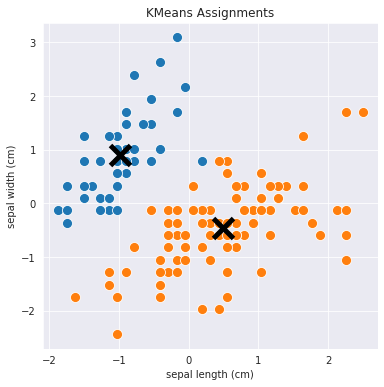

In [6]:
# plot data colored by cluster assignment
def plot_clusters(X,c=None,km=None,title=None,ax=None,marker_size=100):
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,6))
    if km:
        c = km.fit_predict(X)
    for i in range(np.max(c)+1):
        X_cluster = X[c == i]
        sns.scatterplot(x=X_cluster.iloc[:,0],y=X_cluster.iloc[:,1],s=marker_size,ax=ax);
    if km:
        for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5)
    if title:
        ax.set_title(title)
        
plot_clusters(X_iris,km=km,title="KMeans Assignments")

# Plotting clusters and centers

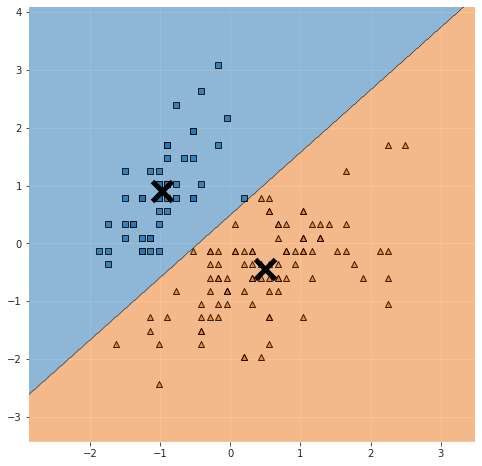

In [7]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plot_decision_regions(X_iris.values,km.predict(X_iris),km,ax=ax,legend=None);
for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5);

# K-Means: How good are the clusters?

- One way: **Within Cluster Sum of Squared Distances**
- How close is every point to it's assigned cluster center?
<br>
    $SSD = \Large \sum_{k=1}^{K} \sum_{x_i\in C_k} \mid\mid x_i-\mu_k\mid\mid_2^2$

    where $\mid\mid x - \mu \mid\mid_2 = \sqrt{\sum_{j=1}^d (x_j - \mu_j)^2}$
<br>
- If this is high, items in cluster are far from their means.
- If this is low, items in cluster are close to their means.

In [8]:
# SSD stored in KMeans as `.inertia_`
round(km.inertia_,2)

166.95

# KMeans in Action

In [9]:
import ipywidgets as widgets
kmeans_video = widgets.Video.from_file('images/kmeans.mp4', width=750, autoplay=False, controls=True)
kmeans_video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x048\xd6mdat\x00\x…

From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# Things you need to define for KMeans

- number of clusters $k$ or `n_clusters`
- initial locations of means
  - random
  - k-means++ (pick starting points far apart from each other)

# How to choose $k$ or `n_clusters`?
<br>

- One way: use "elbow" in sum of squared distances (SSD) or `KMeans.inertia_`
- "elbow" is where SSD ceases to drop rapidly

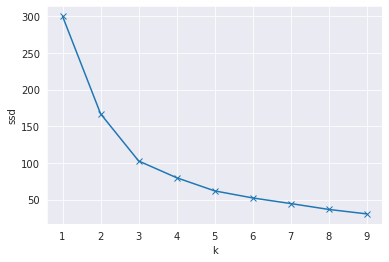

In [10]:
ssd = []
for i in range(1,10):
    ssd.append(KMeans(n_clusters=i).fit(X_iris).inertia_)
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(range(1,10),ssd,marker='x'); 
ax.set_xlabel('k');ax.set_ylabel('ssd');

- Question: What value $k$ will minimize SSD?

# Refitting with k=3

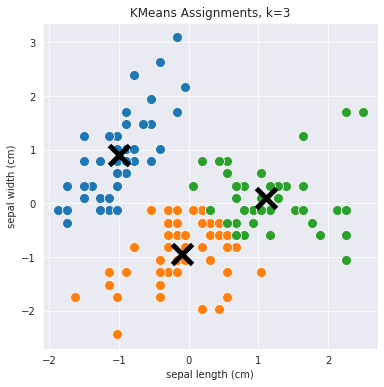

In [11]:
plot_clusters(X_iris,km=KMeans(n_clusters=3,random_state=0),title="KMeans Assignments, k=3")

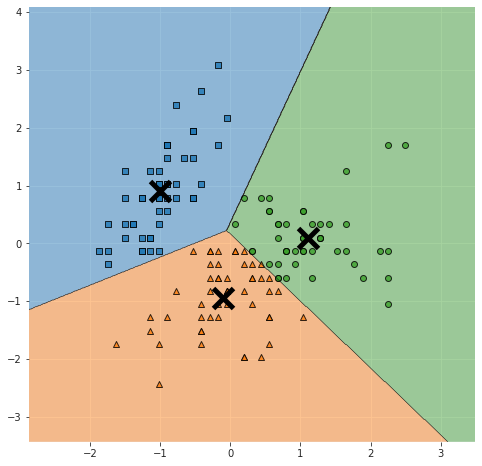

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
km = KMeans(n_clusters=3,random_state=0).fit(X_iris)
plot_decision_regions(X_iris.values,km.predict(X_iris),km,ax=ax,legend=None);
for m in km.cluster_centers_: 
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5);

## KMeans: Another Example

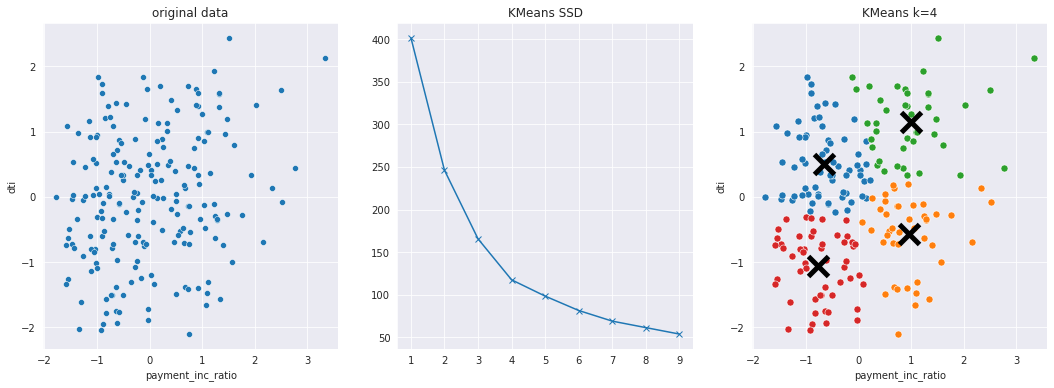

In [13]:
# loading and plotting the data
data = pd.read_csv('../data/loan200.csv')[['payment_inc_ratio','dti']]
from sklearn.preprocessing import StandardScaler
X_loan = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)

fig,ax = plt.subplots(1,3,figsize=(18,6))
sns.scatterplot(x=X_loan.iloc[:,0],y=X_loan.iloc[:,1],ax=ax[0]); 
ax[0].set_title('original data');

ssd = [KMeans(n_clusters=i).fit(X_loan).inertia_ for i in range(1,10)]
ax[1].plot(range(1,10),ssd,marker='x');
ax[1].set_title('KMeans SSD');

plot_clusters(X_loan,km=KMeans(n_clusters=4, random_state=0),title='KMeans k=4',marker_size=50,ax=ax[2])

# KMeans: Synthetic Example

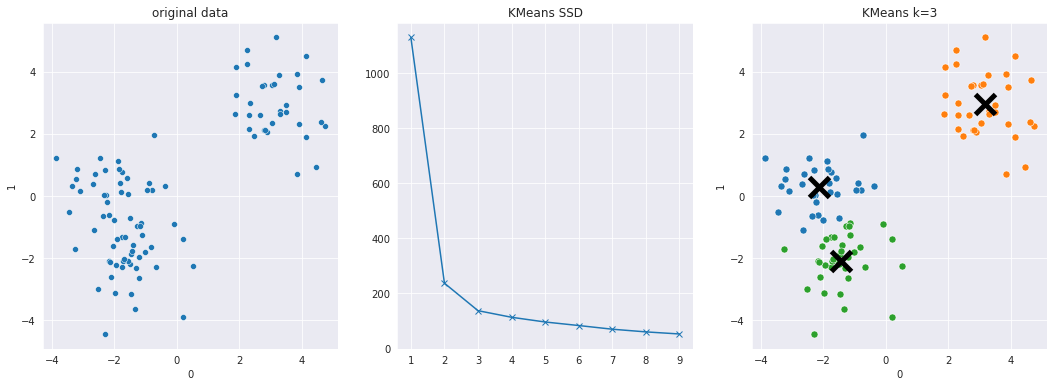

In [14]:
from sklearn.datasets import make_blobs
X_blobs,y_blobs = make_blobs(centers=[(3,3),(-2,0),(-2,-2)],random_state=1)
X_blobs = pd.DataFrame(X_blobs)

fig,ax = plt.subplots(1,3,figsize=(18,6))

sns.scatterplot(x=X_blobs.iloc[:,0],y=X_blobs.iloc[:,1],ax=ax[0]); 
ax[0].set_title('original data');

ssd = [KMeans(n_clusters=i).fit(X_blobs).inertia_ for i in range(1,10)]
ax[1].plot(range(1,10),ssd,marker='x');
ax[1].set_title('KMeans SSD')

plot_clusters(X_blobs,km=KMeans(n_clusters=3, random_state=0),title='KMeans k=3',marker_size=50,ax=ax[2])

# Hierarchical Agglomerative Clustering (HAC)
<br>

- group clusters together from the bottom up
- don't have to specify number of clusters up front
- generates binary tree over data

# HAC: How it works
<br>

```
FIRST: every point is it's own cluster

A: Find pair of clusters that are "closest"

B: Merge into single cluster

GOTO A and Repeat till there is a single cluster
```

# HAC in Action

In [15]:
import ipywidgets as widgets
hac_video = widgets.Video.from_file('images/hac.mp4', width=750, autoplay=False, controls=True)
hac_video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00\x811mdat\x00\x…

From [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

# What is "close"?

- Need to define what we mean by "closeness" by choosing
  - distance metric (how to measure distance)
  - linkage criteria (how to compare clusters)

# Need to define: Distance Metric
<br>

- **Euclidean** : $\sqrt{\sum_{i=1}^n \left(a_i-b_i\right)^2}$
  - easy to use analyitically, sensitive to outliers
<br>
<br>

- **Manhattan** : $\sum_{i=1}^n \mid a_i - b_i \mid$
  - more difficult to use analytically, robust to outliers
<br>
<br>

- **Cosine** : $1 - \frac{\sum{a_i b_i}}{\| a_i \|_2 \| b_i \|_2}$ 
  - angle between vectors while ignoring their scale
<br>
<br>

- many more (see [https://numerics.mathdotnet.com/Distance.html](https://numerics.mathdotnet.com/Distance.html)

# Need to define: **Linkage**
<br>

<div align="center"><img src="images/hac_linkage.png" width="600px"></div>

**single** : shortest distance from item of one cluster to item of the other

**complete** : greatest distance from item of one cluster to item of the other

**average** : average distance of items in one cluster to items in the other

**ward** : minimize variance of clusters being merged (only euclidean metric)

# HAC and Dendrograms: Single Linkage


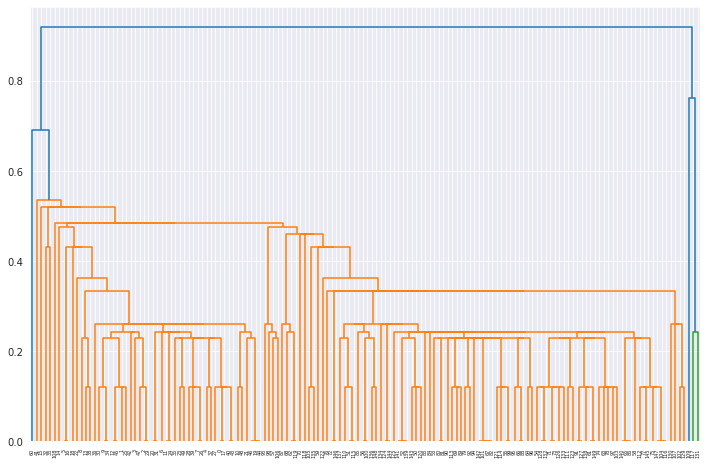

In [16]:
# nice helper function for creating a dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X_iris,'single')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Complete Linkage


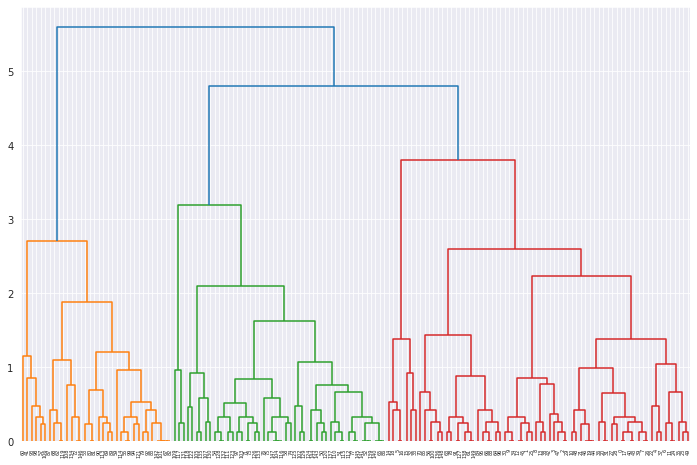

In [17]:
Z = hierarchy.linkage(X_iris,'complete')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Average Linkage

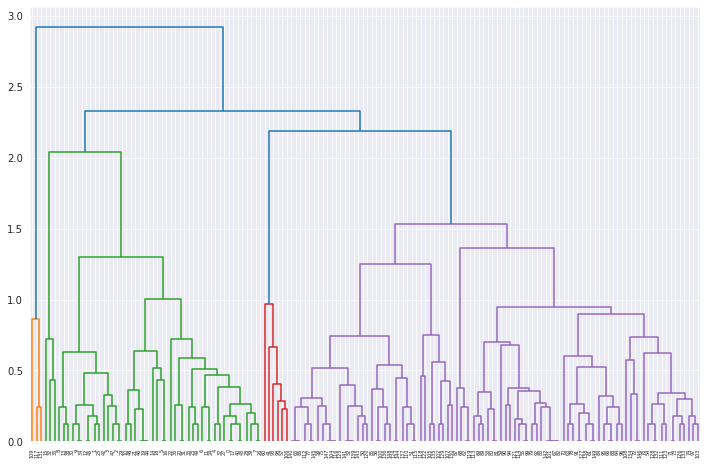

In [18]:
Z = hierarchy.linkage(X_iris,'average')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC and Dendrograms: Ward Linkage

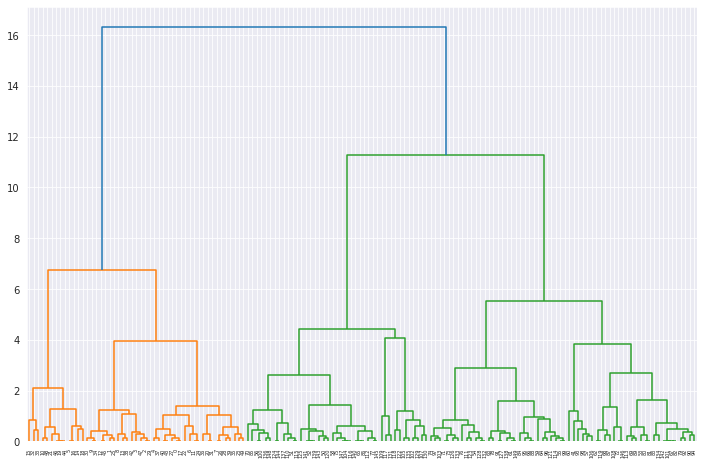

In [19]:
Z = hierarchy.linkage(X_iris,'ward')
fig = plt.figure(figsize=(12,8)); hierarchy.dendrogram(Z);

# HAC in sklearn

In [20]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(linkage='single',
                              affinity='euclidean',
                              n_clusters=4)
c_single = hac.fit_predict(X_iris)

# generate models and assignments for all linkages
models,assignments = [],[]
linkages = ['single','average','complete','ward']
for linkage in linkages:
    models.append(AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=3))
    assignments.append(models[-1].fit_predict(X_iris))
    
# plot on the next slide

# HAC in sklearn

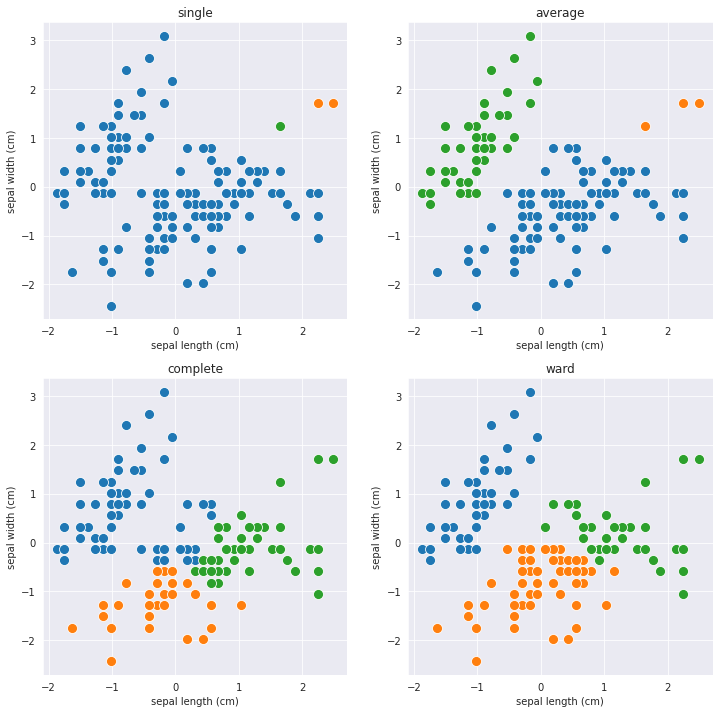

In [21]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
axs = ax.flatten()
for i in range(len(linkage)):
    plot_clusters(X_iris,assignments[i],title=linkages[i],ax=axs[i])

# HAC: Another Example

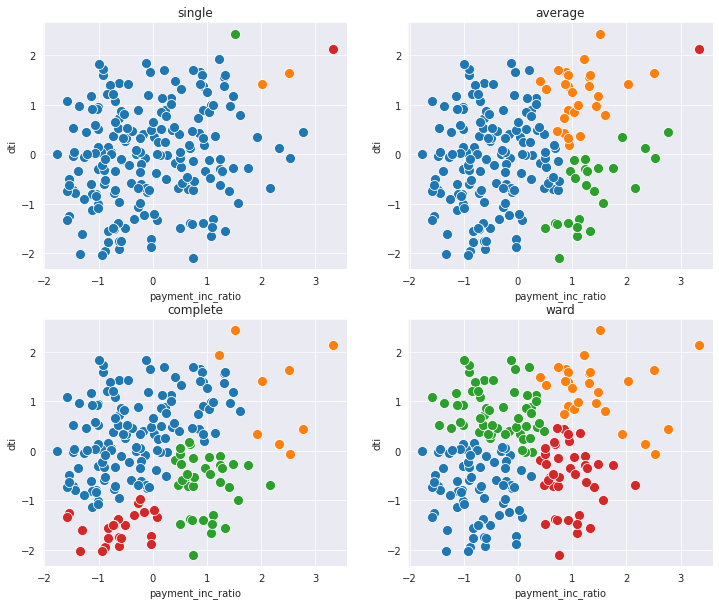

In [22]:
models,assignments,linkages = [],[],['single','average','complete','ward']
for linkage in linkages:
    models.append(AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=4))
    assignments.append(models[-1].fit_predict(X_loan))
fig,ax = plt.subplots(2,2,figsize=(12,10))
axs = ax.flatten()
for i in range(len(linkage)):
    plot_clusters(X_loan,assignments[i],title=linkages[i],ax=axs[i])

# Clustering: Many Other Methods
<br>

<div align="center"><img src="images/sklearn_clustering_methods.png" width="1000px"></div>

From [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html_)

# How to evaluate clustering?
<br>

- Within Cluster Sum of Squared Distances (SSD)
- If we have labels
  - How "pure" are the clusters? Homogeneity
  - Mutual Information
- Silhouette plots (see PML)
- many others ([see sklearn](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation]))

# Clustering Review

- k-Means
- Heirarchical Agglomerative Clustering
  - linkages
  - distance metrics
- Evaluating

<br>
<br>

# <center>Questions re Clustering?</center>
<br>
<br>

# Recommendation Engines
<br>

- Given a user and a set of items to recommend (or rank):
<br>
  
  - Recommend things **similar to the things I've liked**
    - Content-Based Filtering
  <br>
  <br>
  
  - Recommend things **that people with similar tastes have liked**
    - Collaborative Filtering 
  <br>
  <br>
  
  - Hybrid/Ensemble


# Example: Housing Data

In [23]:
df_house = pd.read_csv('../data/house_sales_subset.csv')
df_house = df_house.iloc[:10].loc[:,['SqFtTotLiving','SqFtLot','AdjSalePrice']]
X_house_scaled = StandardScaler().fit_transform(df_house)
df_house_scaled = pd.DataFrame(X_house_scaled,columns=['SqFtTotLiving_scaled','SqFtLot_scaled','AdjSalePrice_scaled'])
df_house_scaled.head()

,SqFtTotLiving_scaled,SqFtLot_scaled,AdjSalePrice_scaled
0,0.399969,-0.466145,-0.699629
1,2.030444,0.647921,2.479556
2,-0.006455,1.255424,1.190602
3,1.356259,-0.544149,-0.120423
4,-0.412878,-0.543943,-0.714964


# Content-Based Filtering
<br>

- Find **other things** similar to **the things I've liked**
- Assume: If I like product A, and product B is like product A, I'll like product B
- Use similarity of items
<br>

- Matrix: items x items
- Values: Similarity of items

# Calculate Distances

- to maximize similarity $\rightarrow$ minimize distance

In [24]:
# using euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

# calculate all pairwise distances between houses
dists = euclidean_distances(X_house_scaled)

np.round(dists,2)

array([[0.  , 3.74, 2.59, 1.12, 0.82, 2.01, 2.73, 0.87, 1.76, 0.84],
       [3.74, 0.  , 2.49, 2.94, 4.19, 4.78, 4.01, 3.79, 5.03, 3.44],
       [2.59, 2.49, 0.  , 2.61, 2.65, 3.25, 1.83, 2.07, 3.31, 2.01],
       [1.12, 2.94, 2.61, 0.  , 1.87, 2.83, 3.19, 1.76, 2.8 , 1.47],
       [0.82, 4.19, 2.65, 1.87, 0.  , 1.32, 2.69, 0.68, 0.97, 0.78],
       [2.01, 4.78, 3.25, 2.83, 1.32, 0.  , 3.59, 1.81, 0.87, 1.61],
       [2.73, 4.01, 1.83, 3.19, 2.69, 3.59, 0.  , 2.05, 3.2 , 2.51],
       [0.87, 3.79, 2.07, 1.76, 0.68, 1.81, 2.05, 0.  , 1.5 , 0.64],
       [1.76, 5.03, 3.31, 2.8 , 0.97, 0.87, 3.2 , 1.5 , 0.  , 1.61],
       [0.84, 3.44, 2.01, 1.47, 0.78, 1.61, 2.51, 0.64, 1.61, 0.  ]])

# Visualizing Distances With a Heatmap

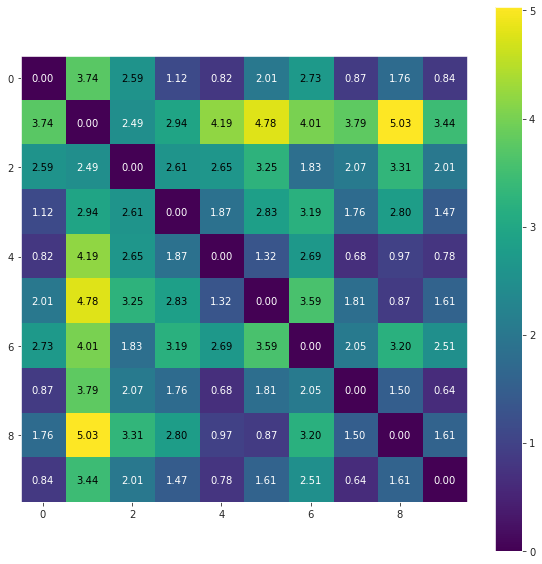

In [25]:
from mlxtend.plotting import heatmap
heatmap(np.round(dists,2),figsize=(10,10));

# Query For Similarity

- Imagine I like house 5
- What houses are similar to house 5?

In [26]:
query_idx = 5
df_house.iloc[query_idx]

SqFtTotLiving       930.0
SqFtLot            1012.0
AdjSalePrice     411781.0
Name: 5, dtype: float64

In [27]:
# Distances to house 5
[f'{x:0.1f}' for x in dists[query_idx]]

['2.0', '4.8', '3.3', '2.8', '1.3', '0.0', '3.6', '1.8', '0.9', '1.6']

# Query For Similarity Cont.


In [28]:
# find indexes of best scores (for distances, want ascending)
best_idxs_asc = np.argsort(dists[query_idx])
best_idxs_asc

array([5, 8, 4, 9, 7, 0, 3, 2, 6, 1])

In [29]:
# the top 10 recommendations with their distances
list(zip(['house '+str(x) for x in best_idxs_asc],
         np.round(dists[query_idx][best_idxs_asc],2)
        )
    )

[('house 5', 0.0),
 ('house 8', 0.87),
 ('house 4', 1.32),
 ('house 9', 1.61),
 ('house 7', 1.81),
 ('house 0', 2.01),
 ('house 3', 2.83),
 ('house 2', 3.25),
 ('house 6', 3.59),
 ('house 1', 4.78)]

# (User Based) Collaborative Filtering

- Recommend things **that people with similar tastes have liked**
- Assume: If both you and I like Movie A, and you like Movie B, I'll like movie B
- Use similarity of user preferences
<br>

- Matrix: Users x Items
- Values: Rankings

<div align="center"><img src="images/user-based_collaborative_filtering.png" width="400px"></div>

# Example: User Interests
<br>
Can we recommend topics based on a users existing interests?

In [30]:
# from Data Science from Scratch by Joel Grus
#https://github.com/joelgrus/data-science-from-scratch.git

users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [31]:
# interests of user0
sorted(users_interests[0])

['Big Data', 'Cassandra', 'HBase', 'Hadoop', 'Java', 'Spark', 'Storm']

# All Unique Interests

In [32]:
# get a sorted list of unique interests (here using set)
unique_interests = sorted({interest
                           for user_interests in users_interests
                           for interest in user_interests})

# the first 5 unique interests
unique_interests

['Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory']

# Transform User Interest Matrix

In [33]:
# Transform between lists of strings and fixed length lists of ints
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=unique_interests)

# a matrix of "user" rows and "interest" columns
user_interest_matrix = mlb.fit_transform(users_interests)

# The interests for user0
user_interest_matrix[0]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# transforming back from interest matrix to list of interests
mlb.inverse_transform(user_interest_matrix)[0]

('Big Data', 'Cassandra', 'HBase', 'Hadoop', 'Java', 'Spark', 'Storm')

# Calculate Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# using similarity, higher values are better
user_similarities = cosine_similarity(user_interest_matrix)

# what are the similarites for user0 to other users?
user_similarities[0]

array([1.        , 0.3380617 , 0.        , 0.        , 0.        ,
       0.15430335, 0.        , 0.        , 0.18898224, 0.56694671,
       0.        , 0.        , 0.        , 0.16903085, 0.        ])

In [36]:
# what users does user0 share interests with?
np.where(user_similarities[0])[0]

array([ 0,  1,  5,  8,  9, 13])

# Find Similar Users

In [37]:
# return a sorted list of users based on similarity
# skip query user and similarity == 0
def most_similar_users_to(query_idx):
    users_scores = [(idx,np.round(sim,4))
                    for idx,sim in enumerate(user_similarities[query_idx])
                    if idx != query_idx and sim > 0]
    return sorted(users_scores, key=lambda x:x[1])

most_similar_users_to(0)

[(5, 0.1543), (13, 0.169), (8, 0.189), (1, 0.3381), (9, 0.5669)]

# Recommend Based On User Similarity

- Want to return items sorted by the similarity of other users

In [38]:
from collections import defaultdict

def user_based_suggestions(user_idx):
    suggestions = defaultdict(float)
    
    # iterate over interests of similar users
    for other_idx, sim in most_similar_users_to(user_idx):
        for interest in users_interests[other_idx]:
            suggestions[interest] += sim
            
    # sort suggestions based on weight
    suggestions = sorted(suggestions.items(),
                        key=lambda x:x[1],
                        reverse=True)
    
    # return only new interests
    return [(suggestion,weight)
            for suggestion,weight in suggestions
            if suggestion not in users_interests[user_idx]]

# Recommend Based On User Similarity

In [39]:
# reminder: original interests
users_interests[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [40]:
# top 5 new recommended interests
user_based_suggestions(0)[:5]

[('MapReduce', 0.5669),
 ('Postgres', 0.5071),
 ('MongoDB', 0.5071),
 ('NoSQL', 0.3381),
 ('neural networks', 0.189)]

# Issues with Collab. Filtering
<br>

- **the cold start problem** : What if it's your first time?
<br>

- **sparcity** : How to recommend movies no one's seen?

# Evaluating Rec. Systems
<br>

- **Precision@N**: Out of top N, how many were true?
<br>

- **Recall@N**: Out of all true, how many were in top N
<br>

- Surprise/Novelty?
<br>

- Diversity?

# Spotify's Recommendation Engine
<br>

[How Does Spotify Know You So Well?](https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe)
<br>

<div align="center"><img src="images/spotify.png" width="1000px"></div>

# Recommendation Engines Review

- Content-Based
- User-Based Collaborative Filtering
- Issues
- Evaluating

<br>
<br>

# <center>Questions re Recommendation Engines?</center>
<br>
<br>

# Time Series
<br>

- Data ordered in time
<br>

- Applications
  - Financial
  - Economic
  - Scientific
  - etc.

# Time Series Differences
<br>

- **Non-i.i.d.** :  not independent and identically distributed
<br>

- not independent
  - Ex: Stock price
<br>
<br>

- not-identically distributed
  - Ex: Seasonality
<br>
<br>

- Order matters

# Representing Time in Python

- `datetime` library
- Pandas `Timestamp`

# `datetime.date`

In [41]:
from datetime import date

friday = date(2020,12,4) # year,month,day
friday

datetime.date(2020, 12, 4)

In [42]:
today = date.today()
today

datetime.date(2021, 11, 29)

In [43]:
today.year

2021

# `datetime.time`

In [44]:
from datetime import time

noon = time(12,0,0) # hour,minute,second,microsecond 
noon

datetime.time(12, 0)

In [45]:
noon.hour

12

# `datetime.datetime`

In [46]:
from datetime import datetime

# year,month,day,hour,minute,second,microsecond
monday_afternoon = datetime(2020,11,30,19,10)
monday_afternoon

datetime.datetime(2020, 11, 30, 19, 10)

In [47]:
now = datetime.now()
now

datetime.datetime(2021, 11, 29, 19, 0, 46, 674886)

# `datetime.timedelta`

In [48]:
diff = datetime(2020,11,30,1) - datetime(2020,11,29,0)
diff

datetime.timedelta(days=1, seconds=3600)

In [49]:
diff.total_seconds()

90000.0

In [50]:
from datetime import timedelta

#days,seconds,microseconds,milliseconds,minutes,hours,weeks
one_day = timedelta(1)

date(2020,11,30) + 2*one_day

datetime.date(2020, 12, 2)

# Printing Datetimes: `strftime()`

In [51]:
print(now)

2021-11-29 19:00:46.674886


In [52]:
now.strftime('%a %h %d, %Y %I:%M %p')

'Mon Nov 29, 2021 07:00 PM'

See [strftime.org](http://strftime.org)

# Parsing Datetimes: `pandas.to_datetime()`

- `dateutil.parser` available
- pandas has parser built in: `pd.to_datetime()`
    

In [53]:
pd.to_datetime('11/22/2019 2:36pm')

Timestamp('2019-11-22 14:36:00')

In [54]:
dt_index = pd.to_datetime([datetime(2020, 11, 26),
                           '27th of November, 2020',
                           '2020-Nov-28',
                           '11-29-2030',
                           '20201130',
                           None
                          ])
dt_index

DatetimeIndex(['2020-11-26', '2020-11-27', '2020-11-28', '2030-11-29',
               '2020-11-30', 'NaT'],
              dtype='datetime64[ns]', freq=None)

# `pandas.Timestamp`

- like datetime.datetime
- can include **timezone** and **frequency** info
- can handle a missing time: `NaT`
- can be used anywhere datetime can be used
- an array of Timestamps can be used as an index

In [55]:
dt_index[0]

Timestamp('2020-11-26 00:00:00')

# Accessing Datetime Components with `.dt`

In [56]:
df_taxi = pd.read_csv('../data/yellowcab_tripdata_2017-01_subset10000rows.csv',
                      parse_dates=['tpep_pickup_datetime']).head(3)
df_taxi.tpep_pickup_datetime

0   2017-01-10 18:37:59
1   2017-01-05 15:14:52
2   2017-01-11 14:47:52
Name: tpep_pickup_datetime, dtype: datetime64[ns]

In [57]:
df_taxi.tpep_pickup_datetime.dt.day

0    10
1     5
2    11
Name: tpep_pickup_datetime, dtype: int64

In [58]:
df_taxi.tpep_pickup_datetime.dt.day_of_week

0    1
1    3
2    2
Name: tpep_pickup_datetime, dtype: int64

In [59]:
df_taxi.tpep_pickup_datetime.dt.hour

0    18
1    15
2    14
Name: tpep_pickup_datetime, dtype: int64

# DateIndex Indexing/Selecting/Slicing

In [60]:
s = pd.Series([101,102,103],
              index=pd.to_datetime(['20191201','20200101','20200201']))
s

2019-12-01    101
2020-01-01    102
2020-02-01    103
dtype: int64

In [61]:
# can index normally using iloc
s.iloc[0:2]

2019-12-01    101
2020-01-01    102
dtype: int64

# DateIndex Indexing/Selecting/Slicing Cont.

In [62]:
# only rows from the year 2020
s.loc['2020']

2020-01-01    102
2020-02-01    103
dtype: int64

In [63]:
# only rows from January 2020
s.loc['2020-01']

2020-01-01    102
dtype: int64

In [64]:
# only rows between Jan 1st 2019 and Jan 1st 2020, inclusive
s.loc['01/01/2019':'01/01/2020']

2019-12-01    101
2020-01-01    102
dtype: int64

In [65]:
# can use the indexing shortcut
s['2020']

2020-01-01    102
2020-02-01    103
dtype: int64

# Datetimes in DataFrames

In [66]:
df = pd.DataFrame([['12/1/2020',101,'A'],
                   ['1/1/2021',102,'B']],columns=['col1','col2','col3'])
df.col1 = pd.to_datetime(df.col1)
df.set_index('col1',drop=True,inplace=True)
df

,col2,col3
col1,,
2020-12-01,101,A
2021-01-01,102,B


In [67]:
# only return rows from 2020
df.loc['2020']

,col2,col3
col1,,
2020-12-01,101,A


# Timestamp Index: Setting Frequency

In [68]:
s = pd.Series([101,103],index=pd.to_datetime(['20201201','20201203']))
s

2020-12-01    101
2020-12-03    103
dtype: int64

In [69]:
# Use resample() and asfreq() to set frequency
s.resample('D').asfreq()

2020-12-01    101.0
2020-12-02      NaN
2020-12-03    103.0
Freq: D, dtype: float64

In [70]:
pd.to_datetime(['20191201','20191203'])

DatetimeIndex(['2019-12-01', '2019-12-03'], dtype='datetime64[ns]', freq=None)

In [71]:
# Use date_range with freq to get a range of dates of a certain frequency
pd.date_range(start='20191201',end='20191203',freq='D')

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03'], dtype='datetime64[ns]', freq='D')

# Timezones

- Handled by `pytz` library

In [72]:
import pytz

[x for x in pytz.common_timezones if x.startswith('U')]

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

UTC: coordinated universal time (EST is 5 hours behind, -5:00)

# Timezones Cont.

In [73]:
ts = pd.date_range('11/2/2019 9:30am',periods=2,freq='D')
ts

DatetimeIndex(['2019-11-02 09:30:00', '2019-11-03 09:30:00'], dtype='datetime64[ns]', freq='D')

In [74]:
# Set timezone using .localize()
ts_utc = ts.tz_localize('UTC')
ts_utc

DatetimeIndex(['2019-11-02 09:30:00+00:00', '2019-11-03 09:30:00+00:00'], dtype='datetime64[ns, UTC]', freq='D')

In [75]:
# Change timezones using .tz_convert()
ts_utc.tz_convert('US/Eastern')

DatetimeIndex(['2019-11-02 05:30:00-04:00', '2019-11-03 04:30:00-05:00'], dtype='datetime64[ns, US/Eastern]', freq='D')

# Timeseries in Python so far:
<br>

- `datetime .date .time .datetime .timedelta`
- format with `.strftime()`
- parse time with `pd.to_datetime()`
- `pandas Timestamp Timedelta DatetimeIndex`
- Indexing with `DatetimeIndex`
- Frequencies
- Timezones
<br>

Additional pandas functionality we won't discuss:
- `Period` and `PeriodIndex`
- `Panels`
<br>
<br>

Next: Operations on Time Series data

<br>
<br>

# <center>Questions re Datetimes in Python?</center>
<br>
<br>